# The Story of the Books

1. [Importing the libraries and loading data](#chapter1)
2. [Data Cleaning](#chapter2)
3. [Exploratory Data Analysis](#chapter3)

#### 1. Importing Libraries and Loading data <a class="anchor" id="chapter1"></a>

In [1]:
import os 
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime as dt
import seaborn as sns
from data_importer import DataImporter
warnings.filterwarnings('ignore')


In [2]:
data_manager = DataImporter()
data_manager.set_user()
data = data_manager.import_data()
df_raw = pd.DataFrame(data)

In [3]:
# helper functions

# get the key values from a list of dictionaries # account for empy lists
get_key_values_from_list = lambda x: [i['k'] for i in x] if len(x) > 0  else []

get_key_values_from_list_nans = lambda x: [i['k'] for i in x] if x != None else []

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6265 entries, 0 to 6264
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   book_id              6265 non-null   object
 1   title                6265 non-null   object
 2   author               6265 non-null   object
 3   price                3761 non-null   object
 4   genres               6265 non-null   object
 5   isbn                 4495 non-null   object
 6   language             5178 non-null   object
 7   series               2384 non-null   object
 8   publisher            5267 non-null   object
 9   year_published       5643 non-null   object
 10  description          6265 non-null   object
 11  current_readers      5478 non-null   object
 12  wanted_to_read       6137 non-null   object
 13  num_reviews          6265 non-null   object
 14  num_ratings          6265 non-null   object
 15  rating               6265 non-null   object
 16  awards

### 2. Cleaning & formating data <a class="anchor" id="chapter2"></a>

In [5]:
df_proc = df_raw.copy()
df_proc.head()

,book_id,title,author,price,genres,isbn,language,series,publisher,year_published,description,current_readers,wanted_to_read,num_reviews,num_ratings,rating,awards,primary_lists,all_lists_link,date_time_of_scrape
0,77203.The_Kite_Runner,The Kite Runner,Khaled Hosseini,None,"[{'k': 'Fiction', 'v': 'https://www.goodreads....",None,English,None,Riverhead Books,"May 1, 2004",1970s Afghanistan: Twelve-year-old Amir is des...,42.9k,1m,"90,234","2,935,385",4.33,[{'k': 'Borders Original Voices Award for Fict...,[{'k': 'Books That Everyone Should Read At Lea...,/list/book/77203,2023-03-23T20:31:37.567776
1,929.Memoirs_of_a_Geisha,Memoirs of a Geisha,Arthur Golden,12.99,"[{'k': 'Fiction', 'v': 'https://www.goodreads....",9781400096893,English,None,Vintage Books USA,"November 22, 2005","A literary sensation and runaway bestseller, t...",12.3k,793k,"34,102","1,922,540",4.14,[],"[{'k': 'Best Books Ever', 'v': '/list/show/1'}...",/list/book/929,2023-03-23T20:31:42.411881
2,128029.A_Thousand_Splendid_Suns,A Thousand Splendid Suns,Khaled Hosseini,12.99,"[{'k': 'Fiction', 'v': 'https://www.goodreads....",9781594489501,English,None,Riverhead Books,"June 1, 2007",Mariam is only fifteen when she is sent to Kab...,32.7k,760k,"69,431","1,417,260",4.42,[{'k': 'British Book Award for Best Read of th...,"[{'k': 'Best Books Ever', 'v': '/list/show/1'}...",/list/book/128029,2023-03-23T20:31:46.875495
3,19063.The_Book_Thief,The Book Thief,Markus Zusak,10.99,"[{'k': 'Historical Fiction', 'v': 'https://www...",None,English,None,Alfred A. Knopf,"March 14, 2006",Librarian's note: An alternate cover edition c...,86k,2m,"134,883","2,345,385",4.39,[{'k': 'National Jewish Book Award for Childre...,"[{'k': 'Best Books Ever', 'v': '/list/show/1'}...",/list/book/19063,2023-03-23T20:32:45.197223
4,4214.Life_of_Pi,Life of Pi,Yann Martel,None,"[{'k': 'Fiction', 'v': 'https://www.goodreads....",9780770430078,English,None,Seal Books,"August 29, 2006",Life of Pi is a fantasy adventure novel by Yan...,24.9k,726k,"51,257","1,544,622",3.93,"[{'k': 'Booker Prize (2002)', 'v': 'https://ww...","[{'k': 'Best Books Ever', 'v': '/list/show/1'}...",/list/book/4214,2023-03-23T20:32:49.804773


In [6]:
# drop columns that are not needed for now
df_proc.drop(columns=['all_lists_link', 'date_time_of_scrape', 'isbn'], inplace=True)

# is a series or not change to boolean based on None vs not None (since feature descriptions will be enough to distinguish intrinsic attributes of a book)
df_proc['series'] = df_proc['series'].apply(lambda x: 1 if x != None else 0)
df_proc

,book_id,title,author,price,genres,language,series,publisher,year_published,description,current_readers,wanted_to_read,num_reviews,num_ratings,rating,awards,primary_lists
0,77203.The_Kite_Runner,The Kite Runner,Khaled Hosseini,None,"[{'k': 'Fiction', 'v': 'https://www.goodreads....",English,0,Riverhead Books,"May 1, 2004",1970s Afghanistan: Twelve-year-old Amir is des...,42.9k,1m,"90,234","2,935,385",4.33,[{'k': 'Borders Original Voices Award for Fict...,[{'k': 'Books That Everyone Should Read At Lea...
1,929.Memoirs_of_a_Geisha,Memoirs of a Geisha,Arthur Golden,12.99,"[{'k': 'Fiction', 'v': 'https://www.goodreads....",English,0,Vintage Books USA,"November 22, 2005","A literary sensation and runaway bestseller, t...",12.3k,793k,"34,102","1,922,540",4.14,[],"[{'k': 'Best Books Ever', 'v': '/list/show/1'}..."
2,128029.A_Thousand_Splendid_Suns,A Thousand Splendid Suns,Khaled Hosseini,12.99,"[{'k': 'Fiction', 'v': 'https://www.goodreads....",English,0,Riverhead Books,"June 1, 2007",Mariam is only fifteen when she is sent to Kab...,32.7k,760k,"69,431","1,417,260",4.42,[{'k': 'British Book Award for Best Read of th...,"[{'k': 'Best Books Ever', 'v': '/list/show/1'}..."
3,19063.The_Book_Thief,The Book Thief,Markus Zusak,10.99,"[{'k': 'Historical Fiction', 'v': 'https://www...",English,0,Alfred A. Knopf,"March 14, 2006",Librarian's note: An alternate cover edition c...,86k,2m,"134,883","2,345,385",4.39,[{'k': 'National Jewish Book Award for Childre...,"[{'k': 'Best Books Ever', 'v': '/list/show/1'}..."
4,4214.Life_of_Pi,Life of Pi,Yann Martel,None,"[{'k': 'Fiction', 'v': 'https://www.goodreads....",English,0,Seal Books,"August 29, 2006",Life of Pi is a fantasy adventure novel by Yan...,24.9k,726k,"51,257","1,544,622",3.93,"[{'k': 'Booker Prize (2002)', 'v': 'https://ww...","[{'k': 'Best Books Ever', 'v': '/list/show/1'}..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,29901665-death-at-st-vedast,Death at St. Vedast,Mary Lawrence,3.99,"[{'k': 'Mystery', 'v': 'https://www.goodreads....",None,1,Kensington Publishing Corporation,"January 1, 2017","During the tempestuous reign of Henry VIII, Lo...",42,"1,595",59,205,3.90,[],"[{'k': 'Best Medical Thrillers', 'v': '/list/s..."
6261,41959631-a-murderous-malady,A Murderous Malady,Christine Trent,12.99,"[{'k': 'Historical Fiction', 'v': 'https://www...",None,1,Crooked Lane Books,"May 7, 2019",For fans of Charles Todd and Deanna Raybourn c...,16,324,86,232,3.79,[],"[{'k': 'Historical Mystery 2019', 'v': '/list/..."
6262,36445482-no-cure-for-the-dead,No Cure for the Dead,Christine Trent,12.99,"[{'k': 'Mystery', 'v': 'https://www.goodreads....",English,1,Crooked Lane Books,"May 8, 2018","When a young nurse dies on her watch, Florence...",53,621,86,380,3.65,[],"[{'k': 'Historical Fiction 2018', 'v': '/list/..."
6263,15793166-the-midwife-s-tale,The Midwife's Tale,Sam Thomas,5.99,"[{'k': 'Historical Fiction', 'v': 'https://www...",English,1,Minotaur Books,"January 8, 2013",In the tradition of Arianna Franklin and C. J....,63,"7,444",421,"2,855",3.66,[],"[{'k': 'Historical Fiction 2013', 'v': '/list/..."


In [7]:
# lets see the unique value for language and publisher
languages = df_proc['language'].unique()
publishers = df_proc['publisher'].unique()
# count of books by language

# QA Do we drop the books that are not in English?
#Yes

print('Languages:', languages,'where most books are in english:', df_proc['language'].value_counts(normalize=True)[0] )
print('Publishers:', publishers)

Languages: ['English' None 'German' 'Hindi' 'Spanish; Castilian' 'French'
 'Dutch; Flemish' 'English, Middle (1100-1500)' 'Norwegian' 'Danish'
 'Bokmål, Norwegian; Norwegian Bokmål' 'Swedish' 'Scots' 'Italian'
 'Persian' 'Chinese' 'Multiple languages' 'Undetermined' 'Indonesian'
 'Croatian'] where most books are in english: 0.9733487833140209
Publishers: ['Riverhead Books' 'Vintage Books USA' 'Alfred A. Knopf' ...
 'Hodder and Stoughton ' 'G.P. Putnam’s Sons' 'Red Puddle Print']


In [8]:
# drop everything except english

df_proc = df_proc[df_proc['language'] == 'English']

In [9]:
# sample 1 item  where the list of genres is empty


#find instance of empy list 
keys = ['genres', 'awards', 'primary_lists']
for key in keys:
     if key == 'primary_lists':
         print(key, len(df_proc[df_proc[key].apply(lambda x: x == None)]))
     else:
         print(key, len(df_proc[df_proc[key].apply(lambda x: len(x) == 0)]))


genres 223
awards 3502
primary_lists 0


In [10]:

def generator_format_list_of_dicts(df, keys):
    """
    Generator function to format the list of dictionaries in the column 'key'
    """
    for key in keys: 
        # apply
        # if value is none then skip
        # if it throws an error then print out the error and skip
        try:
            if key == 'primary_lists':
                df[key] = df[key].apply(get_key_values_from_list_nans)
            else: 
                df[key] = df[key].apply(get_key_values_from_list)
        except Exception as e:
            # print more info about the error
            print('Error in generator_format_list_of_dicts')
            
            print(e)
            continue
    return df

In [11]:
generator_format_list_of_dicts(df_proc, ['genres', 'awards', 'primary_lists'])

# insert_manay(data, uniqueness_index=(book_id))
# replace_many(data)

# col.drop()
# -------
# col.insert()

,book_id,title,author,price,genres,language,series,publisher,year_published,description,current_readers,wanted_to_read,num_reviews,num_ratings,rating,awards,primary_lists
0,77203.The_Kite_Runner,The Kite Runner,Khaled Hosseini,None,"[Fiction, Historical Fiction, Classics, Contem...",English,0,Riverhead Books,"May 1, 2004",1970s Afghanistan: Twelve-year-old Amir is des...,42.9k,1m,"90,234","2,935,385",4.33,[Borders Original Voices Award for Fiction (20...,[Books That Everyone Should Read At Least Once...
1,929.Memoirs_of_a_Geisha,Memoirs of a Geisha,Arthur Golden,12.99,"[Fiction, Historical Fiction, Romance, Histori...",English,0,Vintage Books USA,"November 22, 2005","A literary sensation and runaway bestseller, t...",12.3k,793k,"34,102","1,922,540",4.14,[],"[Best Books Ever, Best Historical Fiction, Boo..."
2,128029.A_Thousand_Splendid_Suns,A Thousand Splendid Suns,Khaled Hosseini,12.99,"[Fiction, Historical Fiction, Contemporary, Hi...",English,0,Riverhead Books,"June 1, 2007",Mariam is only fifteen when she is sent to Kab...,32.7k,760k,"69,431","1,417,260",4.42,[British Book Award for Best Read of the Year ...,"[Best Books Ever, Books That Everyone Should R..."
3,19063.The_Book_Thief,The Book Thief,Markus Zusak,10.99,"[Historical Fiction, Fiction, Young Adult, His...",English,0,Alfred A. Knopf,"March 14, 2006",Librarian's note: An alternate cover edition c...,86k,2m,"134,883","2,345,385",4.39,[National Jewish Book Award for Children’s and...,"[Best Books Ever, Books That Everyone Should R..."
4,4214.Life_of_Pi,Life of Pi,Yann Martel,None,"[Fiction, Fantasy, Classics, Adventure, Contem...",English,0,Seal Books,"August 29, 2006",Life of Pi is a fantasy adventure novel by Yan...,24.9k,726k,"51,257","1,544,622",3.93,"[Booker Prize (2002), Bollinger Everyman Wodeh...","[Best Books Ever, Books That Everyone Should R..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6257,25489259-death-of-an-alchemist,Death of an Alchemist,Mary Lawrence,5.99,"[Mystery, Historical Fiction, Fiction, Histori...",English,1,Kensington Books,"January 26, 2016","In the mid sixteenth century, Henry VIII sits ...",37,"2,085",68,285,3.89,[],[Most Anticipated Historical Mysteries for 201...
6259,52185047-the-lost-boys-of-london,The Lost Boys of London,Mary Lawrence,None,"[Mystery, Historical Fiction, Historical, Fict...",English,1,Red Puddle Print,"April 28, 2020",Set in the final years of King Henry VIII's re...,10,"2,371",51,99,4.39,[],"[Anticipated 2020 Literary Fiction, Crime, mys..."
6262,36445482-no-cure-for-the-dead,No Cure for the Dead,Christine Trent,12.99,"[Mystery, Historical Fiction, Historical Myste...",English,1,Crooked Lane Books,"May 8, 2018","When a young nurse dies on her watch, Florence...",53,621,86,380,3.65,[],"[Historical Fiction 2018, Historical Mystery 2..."
6263,15793166-the-midwife-s-tale,The Midwife's Tale,Sam Thomas,5.99,"[Historical Fiction, Mystery, Fiction, Histori...",English,1,Minotaur Books,"January 8, 2013",In the tradition of Arianna Franklin and C. J....,63,"7,444",421,"2,855",3.66,[],"[Historical Fiction 2013, most anticipated mys..."


In [12]:
def string_to_float_generator(x): 
    if x == 'None':
        return -1 
    elif type(x) == float:
        return x
    elif 'm' in x:
        return float(x.replace('m', '').replace(',', '')) * 1000000
    elif 'k' in x:
        return float(x.replace('k', '').replace(',', '')) * 1000
    else:
        return -1

In [13]:
keys = ['current_reaaders', 'wanted_to_read']
# set index 
df_proc['current_readers'] = df_proc['current_readers'].apply(lambda x: string_to_float_generator(x) if x != None else -1)
df_proc['wanted_to_read'] = df_proc['wanted_to_read'].apply(lambda x: string_to_float_generator(x) if x != None else -1)

In [14]:
# first convert strings to numbers and then replace nan with average 
df_proc['price'] = df_proc['price'].apply(lambda x: float(x) if x != None else np.nan)
df_proc['price'] = df_proc['price'].fillna(df_proc['price'].mean())

In [15]:
# x = df_proc[df_proc['year_published'] == 'May 1, 199']
# # how do I identify special cases like this? 
# x['year_published'].to_string()[-4:-3] == ' ' 
# this led to the realization that there is around 53 books that have a year_published that is not in the correct format
# replace those with nan


def check_year_published_format(x):
    counter = 0
    if x == None: 
        return np.nan
    try:
        return dt.datetime.strptime(x, '%B %d, %Y')
    except ValueError as e:
        counter += 1
        print(e)
        x = np.nan
        return x

In [16]:
# convert year_published to datetime object of month day and year
import datetime as dt 

df_proc['year_published'] = [x for x in df_proc['year_published'].apply(lambda x: check_year_published_format(x))]

time data 'Gollancz' does not match format '%B %d, %Y'
time data 'Penguin Publishing Group' does not match format '%B %d, %Y'
time data 'DAW Books' does not match format '%B %d, %Y'
time data 'May 1, 199' does not match format '%B %d, %Y'
time data 'Emily Bestler Books' does not match format '%B %d, %Y'
time data 'Stephen Douglass' does not match format '%B %d, %Y'
time data 'Blackie' does not match format '%B %d, %Y'
time data "G. B. Putnam's Sons" does not match format '%B %d, %Y'
time data 'Scholastic' does not match format '%B %d, %Y'
time data 'Putnams' does not match format '%B %d, %Y'
time data 'Parasite Publications' does not match format '%B %d, %Y'
time data 'Puffin Books' does not match format '%B %d, %Y'
time data 'Funk and Wagnalls' does not match format '%B %d, %Y'
time data 'Harper-collins Publishers' does not match format '%B %d, %Y'
time data 'Marvel' does not match format '%B %d, %Y'
time data 'Not Avail' does not match format '%B %d, %Y'
time data "Viking Children's 

In [17]:
df_proc.info() # dropped around 1,000 entries due to languages


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 0 to 6264
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   book_id          5040 non-null   object        
 1   title            5040 non-null   object        
 2   author           5040 non-null   object        
 3   price            5040 non-null   float64       
 4   genres           5040 non-null   object        
 5   language         5040 non-null   object        
 6   series           5040 non-null   int64         
 7   publisher        4733 non-null   object        
 8   year_published   4987 non-null   datetime64[ns]
 9   description      5040 non-null   object        
 10  current_readers  5040 non-null   float64       
 11  wanted_to_read   5040 non-null   float64       
 12  num_reviews      5040 non-null   object        
 13  num_ratings      5040 non-null   object        
 14  rating           5040 non-null   object 

### 3. EDA <a class="anchor" id="chapter3"></a>

In [18]:
df = df_proc
df

,book_id,title,author,price,genres,language,series,publisher,year_published,description,current_readers,wanted_to_read,num_reviews,num_ratings,rating,awards,primary_lists
0,77203.The_Kite_Runner,The Kite Runner,Khaled Hosseini,8.717848,"[Fiction, Historical Fiction, Classics, Contem...",English,0,Riverhead Books,2004-05-01,1970s Afghanistan: Twelve-year-old Amir is des...,42900.0,1000000.0,"90,234","2,935,385",4.33,[Borders Original Voices Award for Fiction (20...,[Books That Everyone Should Read At Least Once...
1,929.Memoirs_of_a_Geisha,Memoirs of a Geisha,Arthur Golden,12.990000,"[Fiction, Historical Fiction, Romance, Histori...",English,0,Vintage Books USA,2005-11-22,"A literary sensation and runaway bestseller, t...",12300.0,793000.0,"34,102","1,922,540",4.14,[],"[Best Books Ever, Best Historical Fiction, Boo..."
2,128029.A_Thousand_Splendid_Suns,A Thousand Splendid Suns,Khaled Hosseini,12.990000,"[Fiction, Historical Fiction, Contemporary, Hi...",English,0,Riverhead Books,2007-06-01,Mariam is only fifteen when she is sent to Kab...,32700.0,760000.0,"69,431","1,417,260",4.42,[British Book Award for Best Read of the Year ...,"[Best Books Ever, Books That Everyone Should R..."
3,19063.The_Book_Thief,The Book Thief,Markus Zusak,10.990000,"[Historical Fiction, Fiction, Young Adult, His...",English,0,Alfred A. Knopf,2006-03-14,Librarian's note: An alternate cover edition c...,86000.0,2000000.0,"134,883","2,345,385",4.39,[National Jewish Book Award for Children’s and...,"[Best Books Ever, Books That Everyone Should R..."
4,4214.Life_of_Pi,Life of Pi,Yann Martel,8.717848,"[Fiction, Fantasy, Classics, Adventure, Contem...",English,0,Seal Books,2006-08-29,Life of Pi is a fantasy adventure novel by Yan...,24900.0,726000.0,"51,257","1,544,622",3.93,"[Booker Prize (2002), Bollinger Everyman Wodeh...","[Best Books Ever, Books That Everyone Should R..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6257,25489259-death-of-an-alchemist,Death of an Alchemist,Mary Lawrence,5.990000,"[Mystery, Historical Fiction, Fiction, Histori...",English,1,Kensington Books,2016-01-26,"In the mid sixteenth century, Henry VIII sits ...",-1.0,-1.0,68,285,3.89,[],[Most Anticipated Historical Mysteries for 201...
6259,52185047-the-lost-boys-of-london,The Lost Boys of London,Mary Lawrence,8.717848,"[Mystery, Historical Fiction, Historical, Fict...",English,1,Red Puddle Print,2020-04-28,Set in the final years of King Henry VIII's re...,-1.0,-1.0,51,99,4.39,[],"[Anticipated 2020 Literary Fiction, Crime, mys..."
6262,36445482-no-cure-for-the-dead,No Cure for the Dead,Christine Trent,12.990000,"[Mystery, Historical Fiction, Historical Myste...",English,1,Crooked Lane Books,2018-05-08,"When a young nurse dies on her watch, Florence...",-1.0,-1.0,86,380,3.65,[],"[Historical Fiction 2018, Historical Mystery 2..."
6263,15793166-the-midwife-s-tale,The Midwife's Tale,Sam Thomas,5.990000,"[Historical Fiction, Mystery, Fiction, Histori...",English,1,Minotaur Books,2013-01-08,In the tradition of Arianna Franklin and C. J....,-1.0,-1.0,421,"2,855",3.66,[],"[Historical Fiction 2013, most anticipated mys..."


In [19]:
df.head()

,book_id,title,author,price,genres,language,series,publisher,year_published,description,current_readers,wanted_to_read,num_reviews,num_ratings,rating,awards,primary_lists
0,77203.The_Kite_Runner,The Kite Runner,Khaled Hosseini,8.717848,"[Fiction, Historical Fiction, Classics, Contem...",English,0,Riverhead Books,2004-05-01,1970s Afghanistan: Twelve-year-old Amir is des...,42900.0,1000000.0,"90,234","2,935,385",4.33,[Borders Original Voices Award for Fiction (20...,[Books That Everyone Should Read At Least Once...
1,929.Memoirs_of_a_Geisha,Memoirs of a Geisha,Arthur Golden,12.990000,"[Fiction, Historical Fiction, Romance, Histori...",English,0,Vintage Books USA,2005-11-22,"A literary sensation and runaway bestseller, t...",12300.0,793000.0,"34,102","1,922,540",4.14,[],"[Best Books Ever, Best Historical Fiction, Boo..."
2,128029.A_Thousand_Splendid_Suns,A Thousand Splendid Suns,Khaled Hosseini,12.990000,"[Fiction, Historical Fiction, Contemporary, Hi...",English,0,Riverhead Books,2007-06-01,Mariam is only fifteen when she is sent to Kab...,32700.0,760000.0,"69,431","1,417,260",4.42,[British Book Award for Best Read of the Year ...,"[Best Books Ever, Books That Everyone Should R..."
3,19063.The_Book_Thief,The Book Thief,Markus Zusak,10.990000,"[Historical Fiction, Fiction, Young Adult, His...",English,0,Alfred A. Knopf,2006-03-14,Librarian's note: An alternate cover edition c...,86000.0,2000000.0,"134,883","2,345,385",4.39,[National Jewish Book Award for Children’s and...,"[Best Books Ever, Books That Everyone Should R..."
4,4214.Life_of_Pi,Life of Pi,Yann Martel,8.717848,"[Fiction, Fantasy, Classics, Adventure, Contem...",English,0,Seal Books,2006-08-29,Life of Pi is a fantasy adventure novel by Yan...,24900.0,726000.0,"51,257","1,544,622",3.93,"[Booker Prize (2002), Bollinger Everyman Wodeh...","[Best Books Ever, Books That Everyone Should R..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 0 to 6264
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   book_id          5040 non-null   object        
 1   title            5040 non-null   object        
 2   author           5040 non-null   object        
 3   price            5040 non-null   float64       
 4   genres           5040 non-null   object        
 5   language         5040 non-null   object        
 6   series           5040 non-null   int64         
 7   publisher        4733 non-null   object        
 8   year_published   4987 non-null   datetime64[ns]
 9   description      5040 non-null   object        
 10  current_readers  5040 non-null   float64       
 11  wanted_to_read   5040 non-null   float64       
 12  num_reviews      5040 non-null   object        
 13  num_ratings      5040 non-null   object        
 14  rating           5040 non-null   object 

As we can see, our data has 5040 entries and 17 columns. The dataset contains categorical and numerical values that we might need to adjust.

In [21]:
df.isnull().sum()

book_id              0
title                0
author               0
price                0
genres               0
language             0
series               0
publisher          307
year_published      53
description          0
current_readers      0
wanted_to_read       0
num_reviews          0
num_ratings          0
rating               0
awards               0
primary_lists        0
dtype: int64

The dataset contains some missing values. We will deal with them later. Now lets understand what each column means.

*Features:*

**book_id:** Identification number for each book

**title:** Name under which the book was published

**author:** Names of the authors of the book

**price:** Price of the book (In Dolars)

**genres:** Genres of the books (Max 5 genres)

**language:** Language of the book

**series:** If the book belongs to a series of books the value will be 1, If it does not, the value will be 0

**publisher:** Company responsible for printing, distributing and marketing the book

**year_published:** Date when it was published

**current_readers:** Readers currently reading the book

**wanted_to_read:** Amount of users who have saved the book to read in the future

**num_reviews:** Number of reviews the book has received

**num_ratings:** Number of ratings the book has received

**rating:** Overall rating of the book

**awards:** Name of an award a book has received

**primary_lists:** List the book belongs to ('Books everybody should read')

In [22]:
# Lets check the language values
df['language'].value_counts()


English    5040
Name: language, dtype: int64

Since there is only 1 language, We are going to remove this column

In [23]:
df.drop('language', axis=1, inplace=True)

We also want to know what 'series' is exactly, so lets take a look at the type of data in this column: (The meaning can be found on the features description above)

In [24]:
df['series'].value_counts()

0    2794
1    2246
Name: series, dtype: int64

Lets start dealing with the missing values

In [25]:
df.isnull().sum()

book_id              0
title                0
author               0
price                0
genres               0
series               0
publisher          307
year_published      53
description          0
current_readers      0
wanted_to_read       0
num_reviews          0
num_ratings          0
rating               0
awards               0
primary_lists        0
dtype: int64

In [26]:
# Replace missing values in 'publisher' with a new category called 'unknown'
df['publisher'].fillna('unknown', inplace=True)

In [27]:
#Dropping the rows with missing values in 'year_published'
df.dropna(subset=['year_published'], inplace=True)

In [28]:
#The description column is not needed for our analysis at the moment
df.drop('description', axis=1, inplace=True)

In [29]:
df.isnull().sum()

book_id            0
title              0
author             0
price              0
genres             0
series             0
publisher          0
year_published     0
current_readers    0
wanted_to_read     0
num_reviews        0
num_ratings        0
rating             0
awards             0
primary_lists      0
dtype: int64

Now lets take a look at our datas information again

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 6264
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   book_id          4987 non-null   object        
 1   title            4987 non-null   object        
 2   author           4987 non-null   object        
 3   price            4987 non-null   float64       
 4   genres           4987 non-null   object        
 5   series           4987 non-null   int64         
 6   publisher        4987 non-null   object        
 7   year_published   4987 non-null   datetime64[ns]
 8   current_readers  4987 non-null   float64       
 9   wanted_to_read   4987 non-null   float64       
 10  num_reviews      4987 non-null   object        
 11  num_ratings      4987 non-null   object        
 12  rating           4987 non-null   object        
 13  awards           4987 non-null   object        
 14  primary_lists    4987 non-null   object 

As we can see, the number of ratings is a categorical value, but it should be numerical

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 6264
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   book_id          4987 non-null   object        
 1   title            4987 non-null   object        
 2   author           4987 non-null   object        
 3   price            4987 non-null   float64       
 4   genres           4987 non-null   object        
 5   series           4987 non-null   int64         
 6   publisher        4987 non-null   object        
 7   year_published   4987 non-null   datetime64[ns]
 8   current_readers  4987 non-null   float64       
 9   wanted_to_read   4987 non-null   float64       
 10  num_reviews      4987 non-null   object        
 11  num_ratings      4987 non-null   object        
 12  rating           4987 non-null   object        
 13  awards           4987 non-null   object        
 14  primary_lists    4987 non-null   object 

In [32]:
df[df.duplicated(['book_id'], keep = False)]

,book_id,title,author,price,genres,series,publisher,year_published,current_readers,wanted_to_read,num_reviews,num_ratings,rating,awards,primary_lists


In [33]:
# remove commas from 'num_ratings' column and convert to numeric type
df['num_ratings'] = pd.to_numeric(df['num_ratings'].str.replace(',', ''))

df['rating'] = df['rating'].str.extract('(\d+)').astype(float)

df['num_reviews'] = df['num_reviews'].str.extract('(\d+)').astype(int)

Now we can take a deeper look into the data

In [34]:
def plot_books_by(df, col, n_rows=10):
    plt.figure(figsize=(12,7))
    ax = sns.barplot(x=df[col].head(n_rows), y=df['title'].head(n_rows), data=df)
    plt.title('Best ' + str(n_rows) + ' books by ' + col.replace('_',' ').capitalize(), weight='bold')
    plt.xlabel('Score of ' + col)
    plt.ylabel('Book Title')  

In [35]:
important_cols = ['title', 'author', 'rating', 'num_ratings', 'genres']

TOP RATED BOOKS

In [36]:
book_sorted_ratings = df[df['num_ratings']>=1000000].sort_values('rating', ascending=False)
book_sorted_ratings[important_cols].head(15)

,title,author,rating,num_ratings,genres
0,The Kite Runner,Khaled Hosseini,4.0,2935385,"[Fiction, Historical Fiction, Classics, Contem..."
900,Harry Potter and the Deathly Hallows,J.K. Rowling,4.0,3445100,"[Fantasy, Young Adult, Fiction, Magic, Childre..."
1102,The Help,Kathryn Stockett,4.0,2586398,"[Fiction, Historical Fiction, Historical, Adul..."
1101,Water for Elephants,Sara Gruen,4.0,1551453,"[Fiction, Historical Fiction, Romance, Histori..."
966,The Glass Castle,Jeannette Walls,4.0,1110761,"[Nonfiction, Memoir, Biography, Biography Memo..."
952,The Secret Garden,Frances Hodgson Burnett,4.0,1090609,"[Classics, Fiction, Childrens, Young Adult, Hi..."
941,Into the Wild,Jon Krakauer,4.0,1032983,"[Travel, Adventure, Classics, Fiction, Nature,..."
940,Little Women,Louisa May Alcott,4.0,2072730,"[Classics, Fiction, Historical Fiction, Young ..."
930,To Kill a Mockingbird,Harper Lee,4.0,5651617,"[Classics, Fiction, Historical Fiction, School..."
926,The Little Prince,Antoine de Saint-Exupéry,4.0,1903807,"[Classics, Fiction, Fantasy, Childrens, France..."


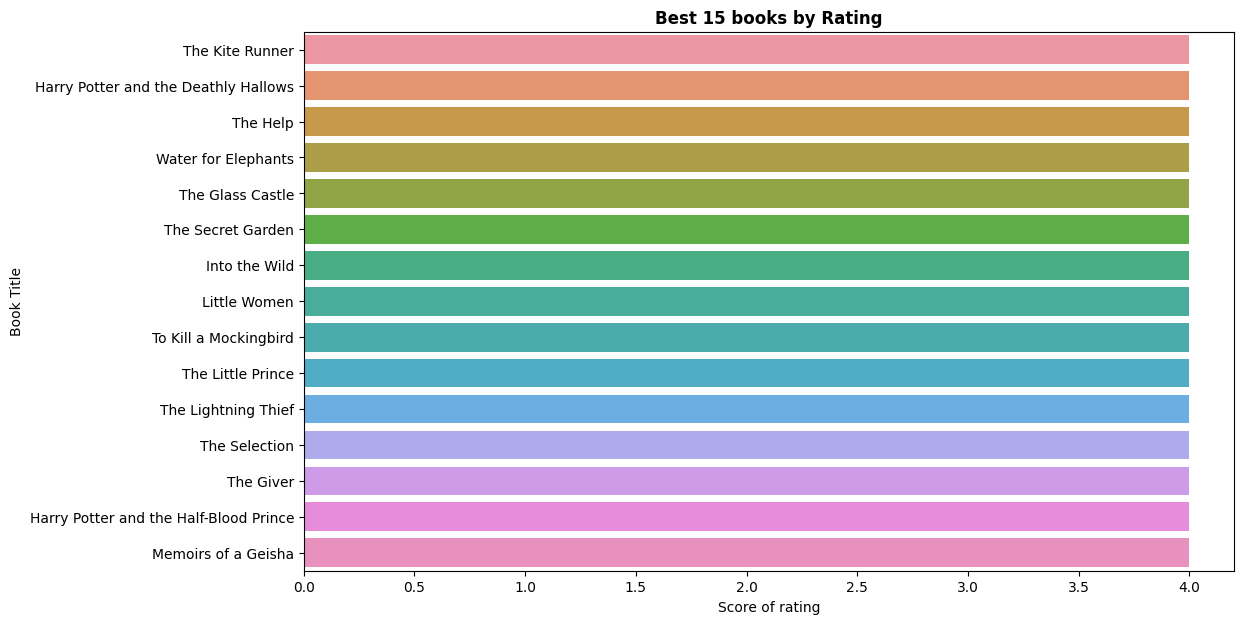

In [37]:
plot_books_by(book_sorted_ratings, 'rating', 15)

MOST POPULAR BOOKS

In [38]:
book_sorted_ratings_count = df.sort_values('num_ratings', ascending=False)
book_sorted_ratings_count[important_cols].head(15)

,title,author,rating,num_ratings,genres
115,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.0,9208051,"[Fantasy, Fiction, Young Adult, Magic, Childre..."
99,The Hunger Games,Suzanne Collins,4.0,7898283,"[Young Adult, Fiction, Dystopia, Fantasy, Scie..."
845,Twilight,Stephenie Meyer,3.0,6121452,"[Fantasy, Young Adult, Romance, Fiction, Vampi..."
1104,To Kill a Mockingbird,Harper Lee,4.0,5651663,"[Classics, Fiction, Historical Fiction, School..."
930,To Kill a Mockingbird,Harper Lee,4.0,5651617,"[Classics, Fiction, Historical Fiction, School..."
887,The Great Gatsby,F. Scott Fitzgerald,3.0,4801741,"[Classics, Fiction, School, Historical Fiction..."
839,The Fault in Our Stars,John Green,4.0,4725830,"[Young Adult, Romance, Fiction, Contemporary, ..."
2731,1984,George Orwell,4.0,4163051,"[Classics, Fiction, Science Fiction, Dystopia,..."
687,1984,George Orwell,4.0,4161994,"[Classics, Fiction, Science Fiction, Dystopia,..."
840,Pride and Prejudice,Jane Austen,4.0,3911165,"[Classics, Fiction, Romance, Historical Fictio..."


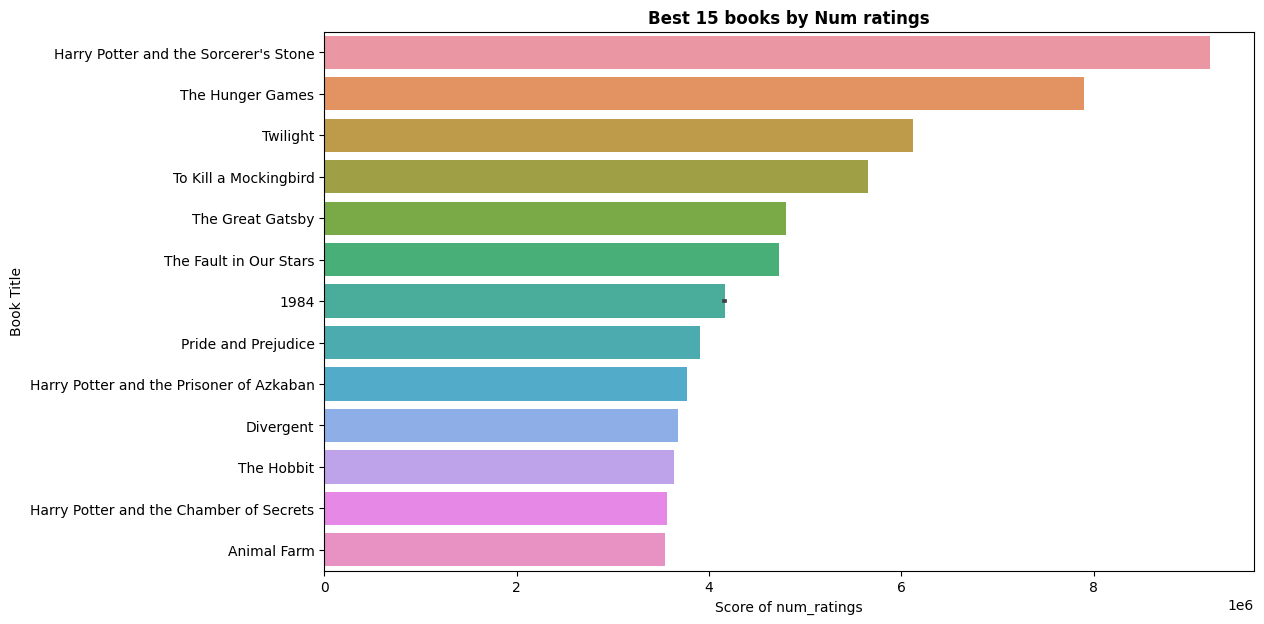

In [39]:
plot_books_by(book_sorted_ratings_count, 'num_ratings', 15)

Coming up with new features with feature-engineering (Combining rating and num_ratings to create a new scorer)

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
cols = ['num_ratings','rating']
scaler = MinMaxScaler()
df_normalized = df[important_cols].copy()
df_normalized[cols] = scaler.fit_transform(df_normalized[cols])

In [42]:
df_normalized.head()

,title,author,rating,num_ratings,genres
0,The Kite Runner,Khaled Hosseini,0.8,0.318785,"[Fiction, Historical Fiction, Classics, Contem..."
1,Memoirs of a Geisha,Arthur Golden,0.8,0.208789,"[Fiction, Historical Fiction, Romance, Histori..."
2,A Thousand Splendid Suns,Khaled Hosseini,0.8,0.153915,"[Fiction, Historical Fiction, Contemporary, Hi..."
3,The Book Thief,Markus Zusak,0.8,0.254710,"[Historical Fiction, Fiction, Young Adult, His..."
4,Life of Pi,Yann Martel,0.6,0.167747,"[Fiction, Fantasy, Classics, Adventure, Contem..."


Creating another column which combines rating and num_rating

In [43]:
df['book_score'] = 0.5 * df_normalized['num_ratings'] + 0.5 * df_normalized['rating']

In [44]:
df_normalized_sorted_score = df.sort_values('book_score', ascending=False)
df_normalized_sorted_score.head()

,book_id,title,author,price,genres,series,publisher,year_published,current_readers,wanted_to_read,num_reviews,num_ratings,rating,awards,primary_lists,book_score
115,3.Harry_Potter_and_the_Sorcerer_s_Stone,Harry Potter and the Sorcerer's Stone,J.K. Rowling,8.990000,"[Fantasy, Fiction, Young Adult, Magic, Childre...",1,Scholastic Inc,2003-11-01,207000.0,1000000.0,145,9208051,4.0,[Mythopoeic Fantasy Award for Children's Liter...,"[Best Young Adult Books, Best Books of the 20t...",0.900000
99,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,0.000000,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...",1,Scholastic Press,2008-10-14,77100.0,1000000.0,193,7898283,4.0,[Locus Award Nominee for Best Young Adult Book...,"[Best Books Ever, Best Young Adult Books, Best...",0.828879
1104,6682611-to-kill-a-mockingbird,To Kill a Mockingbird,Harper Lee,8.717848,"[Classics, Fiction, Historical Fiction, School...",1,Popular Library,1962-03-01,80000.0,57200.0,109,5651663,4.0,"[Pulitzer Prize for Fiction (1961), Audie Awar...","[Awesome books for women, Help me pick 45 book...",0.706887
930,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,Harper Lee,8.717848,"[Classics, Fiction, Historical Fiction, School...",1,Harper Perennial Modern Classics,2006-05-23,80000.0,57200.0,109,5651617,4.0,"[Pulitzer Prize for Fiction (1961), Audie Awar...",[Books That Everyone Should Read At Least Once...,0.706885
839,11870085-the-fault-in-our-stars,The Fault in Our Stars,John Green,8.717848,"[Young Adult, Romance, Fiction, Contemporary, ...",0,Dutton Books,2012-01-10,65000.0,2000000.0,172,4725830,4.0,"[Georgia Peach Book Award (2013), Buxtehuder B...","[Best Books Ever, Best Young Adult Books, Best...",0.656614


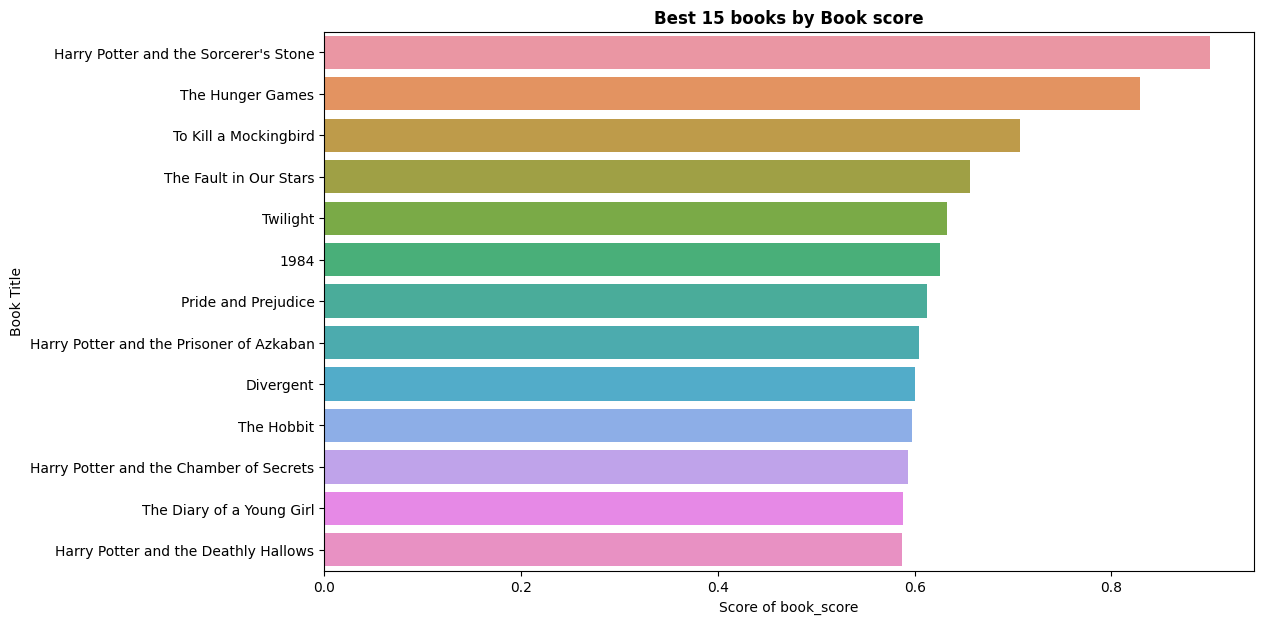

In [45]:
plot_books_by(df_normalized_sorted_score, 'book_score', 15)

As we can see, Harry Potter Books appear multiple times

Lets take a look at the authors

In [46]:
df.author.value_counts()

Ruby Dixon                       35
Agatha Christie                  22
Rick Riordan                     19
Michael Connelly                 19
Stephen King                     18
                                 ..
Renée Ahdieh                      1
Simon Winchester                  1
Mary Robinette Kowal              1
Winston Groom                     1
Olugbemisola Rhuday-Perkovich     1
Name: author, Length: 3512, dtype: int64

In [47]:
author_count = df.author.value_counts()

In [48]:


def plot_authors_by(df, title, xlabel, n=15, ylabel='Author', y_size=7):
    plt.figure(figsize=(15,y_size))
    ax = sns.barplot(x=df.head(n).values, y=df.head(n).index)
    plt.title(title, weight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)



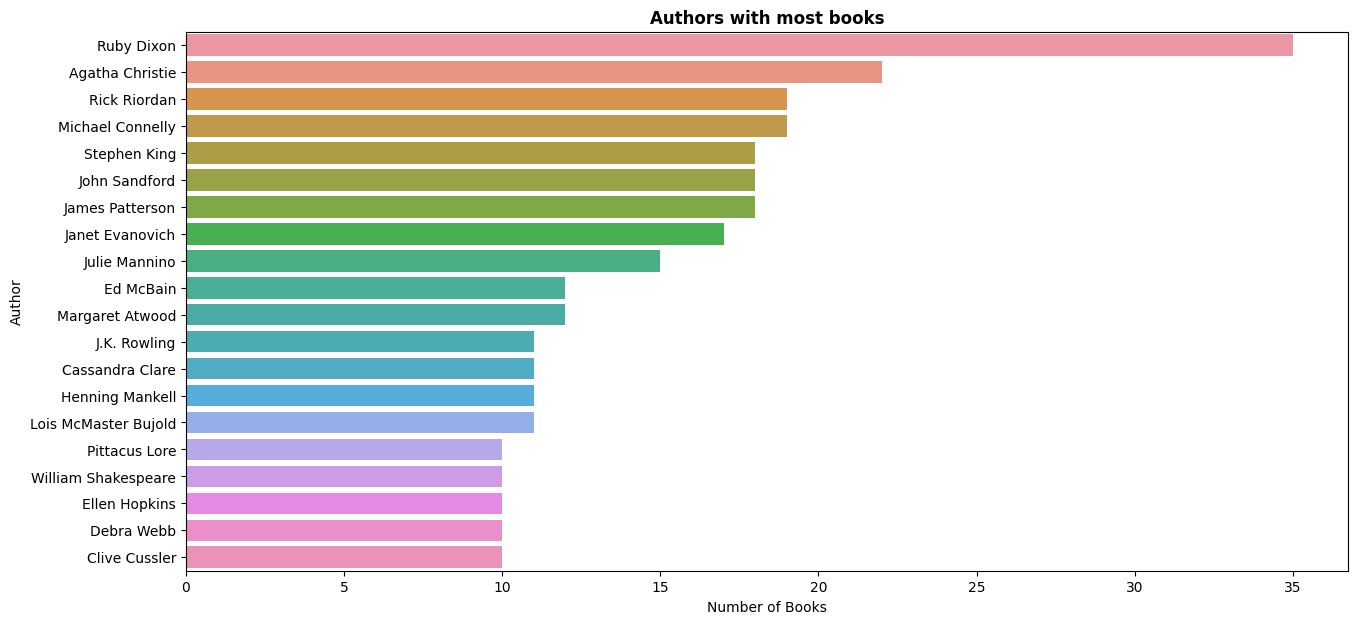

In [49]:
plot_authors_by(author_count, 'Authors with most books', 'Number of Books', 20)

We should rank authors based on their number of books and total rating count since an author with few books and few 5 star ratings will not be the same as an author with an average rating of 4.5 ~

In [50]:
def min_books(df, n):
    more_than_n = df['author'].value_counts().values >= n
    return df['author'].isin(df['author'].value_counts()[more_than_n == True].index)

In [51]:
def min_ratings_count(df, n):
    return df.num_ratings >= n

In [52]:
min_books(df, 5).head()

0    False
1    False
2    False
3    False
4    False
Name: author, dtype: bool

In [53]:
min_ratings_count(df, 10000).head()

0    True
1    True
2    True
3    True
4    True
Name: num_ratings, dtype: bool

In [54]:
df['author'].value_counts().describe()

count    3512.000000
mean        1.419989
std         1.453300
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        35.000000
Name: author, dtype: float64

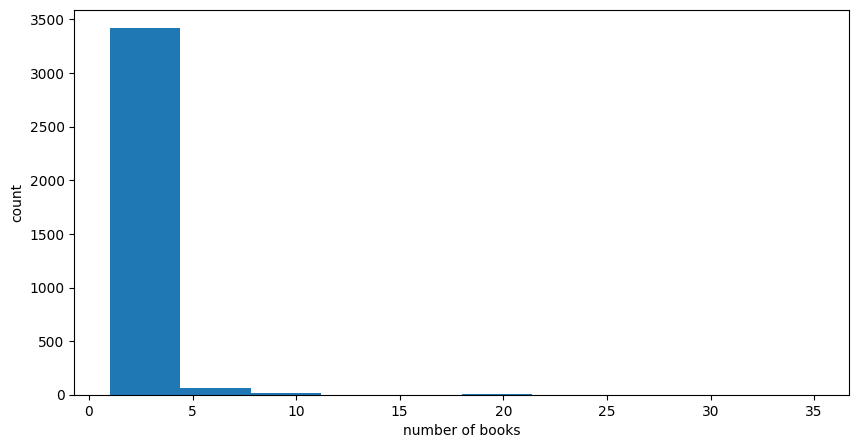

In [55]:
plt.figure(figsize=(10,5))
plt.hist(df.author.value_counts().values);
plt.xlabel('number of books');
plt.ylabel('count');

In [56]:
df['num_ratings'].describe()

count    4.987000e+03
mean     1.061345e+05
std      4.185656e+05
min      0.000000e+00
25%      2.370000e+02
50%      3.515000e+03
75%      3.576100e+04
max      9.208051e+06
Name: num_ratings, dtype: float64

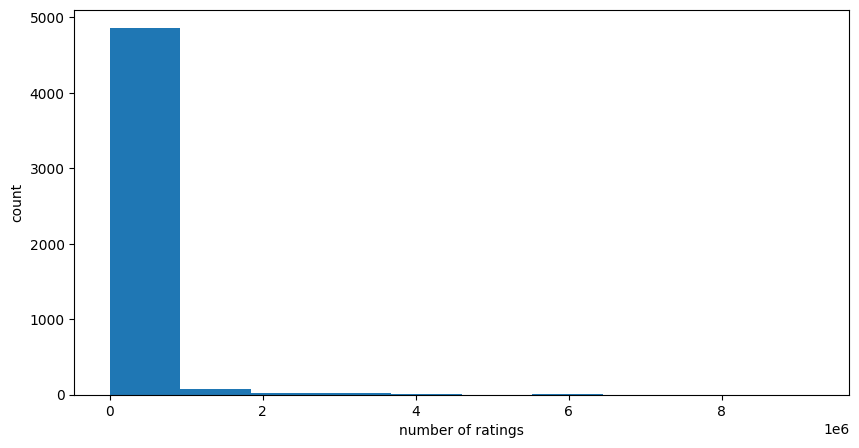

In [57]:
plt.figure(figsize=(10,5))
plt.hist(df['num_ratings']);
plt.xlabel('number of ratings');
plt.ylabel('count');

We are now going to define our successful author: Lets say 100k ratings and at least 10 books

In [58]:
s_author_books = min_books(df, 5)
s_author_ratings = min_ratings_count(df, 50000)

In [59]:


best_rating_authors = df[s_author_books & s_author_ratings].groupby('author')['rating'].mean().sort_values(ascending=False)
best_rating_authors.head(15)



author
George R.R. Martin      4.0
Ellen Hopkins           4.0
Philip Pullman          4.0
Laura Ingalls Wilder    4.0
L.M. Montgomery         4.0
Ken Follett             4.0
Richelle Mead           4.0
John Sandford           4.0
Rick Riordan            4.0
James Rollins           4.0
J.R.R. Tolkien          4.0
J.K. Rowling            4.0
Robert A. Heinlein      4.0
Robert Jordan           4.0
Pearl S. Buck           4.0
Name: rating, dtype: float64

Lets see how many 'successful' authors there are in our dataset:

In [60]:
print('Sucsessful Authors are {} of {} authors'.format(len(best_rating_authors),len(df.author.unique())))

Sucsessful Authors are 57 of 3512 authors


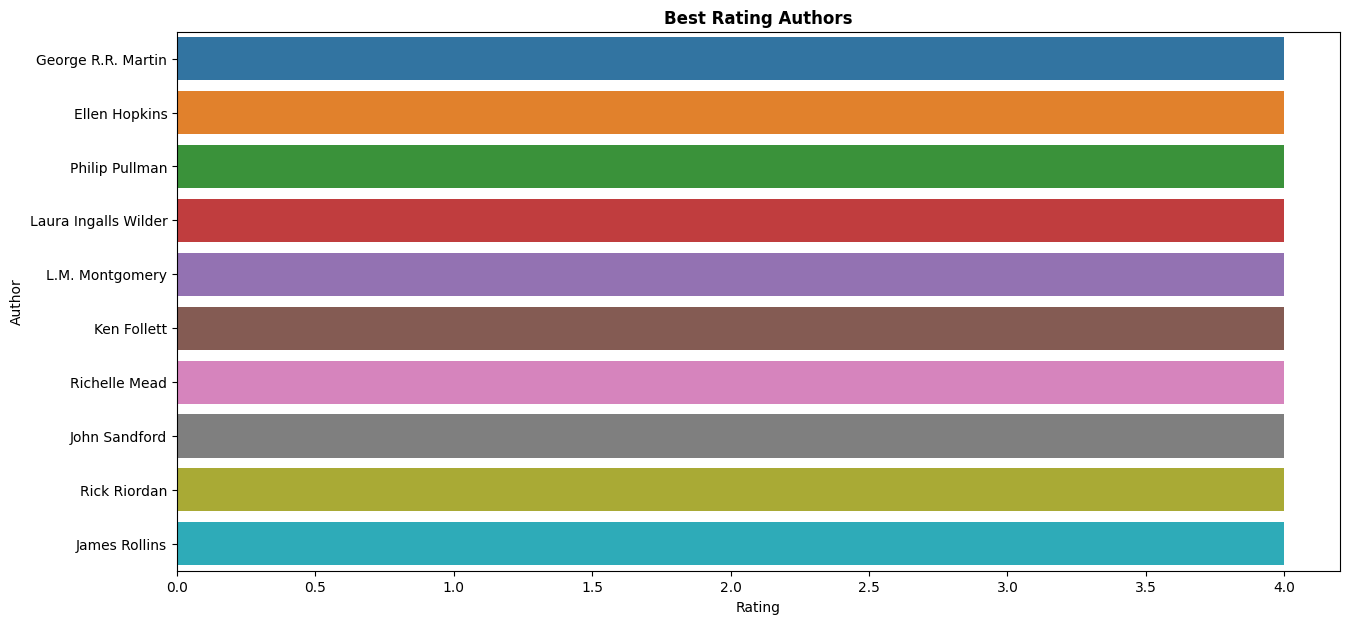

In [61]:
plot_authors_by(best_rating_authors, 'Best Rating Authors', 'Rating', 10)

Now lets see the authors with the most ratings:

In [62]:
most_ratings_authors = df.groupby('author')['num_ratings'].sum().sort_values(ascending=False)
most_ratings_authors.head(15)

author
J.K. Rowling           36324600
George Orwell          15469823
Suzanne Collins        14581071
Rick Riordan           12790614
Stephenie Meyer        12178814
Harper Lee             11303280
J.R.R. Tolkien         10614196
Dan Brown               7680224
George R.R. Martin      7629206
Cassandra Clare         7169203
Stephen King            6743547
John Green              6585372
William Shakespeare     6260218
Veronica Roth           6124465
Jane Austen             5035206
Name: num_ratings, dtype: int64

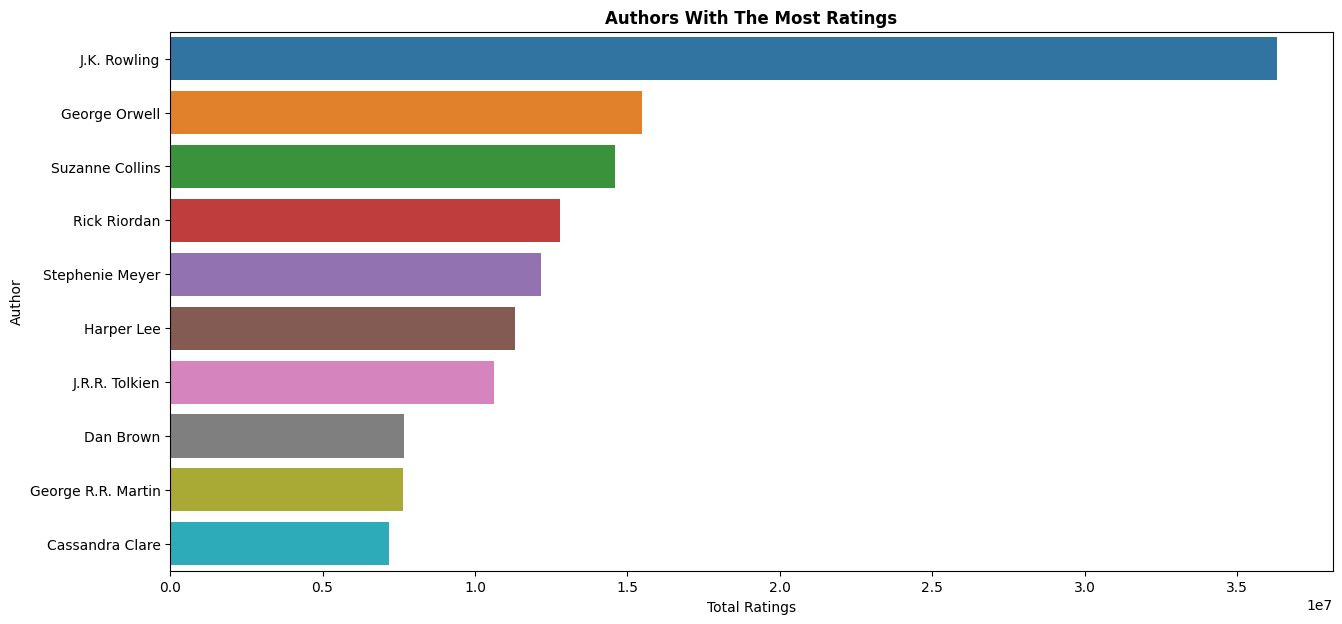

In [63]:
plot_authors_by(most_ratings_authors, 'Authors With The Most Ratings', 'Total Ratings', 10)

The same way we did with the best books, we are going to use feature-engineering to create a new scorer for authors

In [64]:
best_rating_authors_normalized = pd.DataFrame(best_rating_authors.values, index=best_rating_authors.index, columns=['rating'])
best_rating_authors_normalized['rating'] = scaler.fit_transform(best_rating_authors_normalized)
best_rating_authors_normalized.head()

,rating
author,
George R.R. Martin,1.0
Ellen Hopkins,1.0
Philip Pullman,1.0
Laura Ingalls Wilder,1.0
L.M. Montgomery,1.0


In [65]:
authors_rating_score = df['author'].apply(lambda x: best_rating_authors_normalized.loc[x].rating if x in best_rating_authors_normalized.index else 0.0)
authors_rating_score.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: author, dtype: float64

In [66]:
most_ratings_authors_normalized = pd.DataFrame(most_ratings_authors.values, index=most_ratings_authors.index, columns=['rating'])
most_ratings_authors_normalized['rating'] = scaler.fit_transform(most_ratings_authors_normalized)
most_ratings_authors_normalized.head()

,rating
author,
J.K. Rowling,1.000000
George Orwell,0.425877
Suzanne Collins,0.401410
Rick Riordan,0.352120
Stephenie Meyer,0.335277


In [67]:
authors_ratings_count_score = df['author'].apply(lambda x: most_ratings_authors_normalized.loc[x].rating)
authors_ratings_count_score.head()

0    0.129493
1    0.105863
2    0.129493
3    0.068814
4    0.042523
Name: author, dtype: float64

In [68]:
df['author_score'] = 0.5 * authors_rating_score + 0.5 * authors_ratings_count_score
df['author_score'].head()

0    0.064747
1    0.052931
2    0.064747
3    0.034407
4    0.021261
Name: author_score, dtype: float64

In [69]:
best_authors = df.groupby('author')['author_score'].mean().sort_values(ascending=False)
best_authors.head(15)

author
J.K. Rowling          1.000000
Rick Riordan          0.676060
J.R.R. Tolkien        0.646102
George R.R. Martin    0.605014
Suzanne Collins       0.600705
Cassandra Clare       0.598682
Diana Gabaldon        0.540026
Philip Pullman        0.534080
Richelle Mead         0.530301
Brandon Sanderson     0.530152
Dr. Seuss             0.525535
Robert Jordan         0.524105
Ken Follett           0.523029
L.M. Montgomery       0.518483
Michael Connelly      0.518069
Name: author_score, dtype: float64

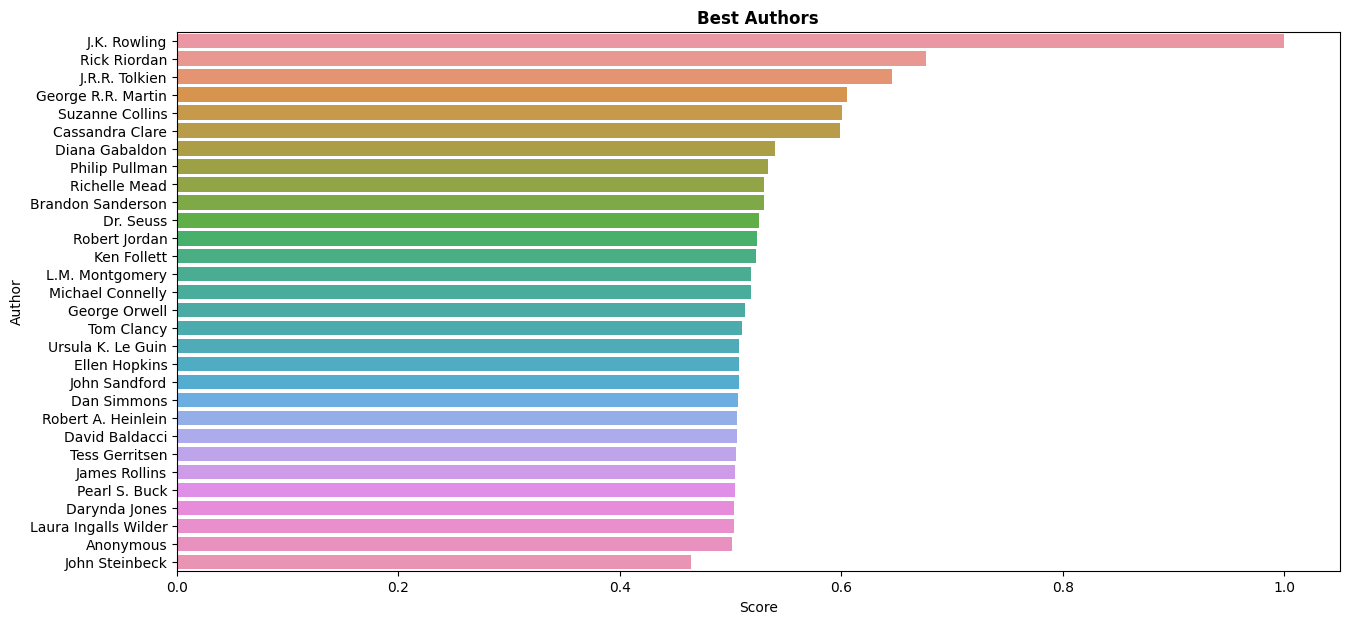

In [70]:
plot_authors_by(best_authors, 'Best Authors', 'Score', 30)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 6264
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   book_id          4987 non-null   object        
 1   title            4987 non-null   object        
 2   author           4987 non-null   object        
 3   price            4987 non-null   float64       
 4   genres           4987 non-null   object        
 5   series           4987 non-null   int64         
 6   publisher        4987 non-null   object        
 7   year_published   4987 non-null   datetime64[ns]
 8   current_readers  4987 non-null   float64       
 9   wanted_to_read   4987 non-null   float64       
 10  num_reviews      4987 non-null   int32         
 11  num_ratings      4987 non-null   int64         
 12  rating           4987 non-null   float64       
 13  awards           4987 non-null   object        
 14  primary_lists    4987 non-null   object 

In [72]:
df.head()

,book_id,title,author,price,genres,series,publisher,year_published,current_readers,wanted_to_read,num_reviews,num_ratings,rating,awards,primary_lists,book_score,author_score
0,77203.The_Kite_Runner,The Kite Runner,Khaled Hosseini,8.717848,"[Fiction, Historical Fiction, Classics, Contem...",0,Riverhead Books,2004-05-01,42900.0,1000000.0,90,2935385,4.0,[Borders Original Voices Award for Fiction (20...,[Books That Everyone Should Read At Least Once...,0.559392,0.064747
1,929.Memoirs_of_a_Geisha,Memoirs of a Geisha,Arthur Golden,12.990000,"[Fiction, Historical Fiction, Romance, Histori...",0,Vintage Books USA,2005-11-22,12300.0,793000.0,34,1922540,4.0,[],"[Best Books Ever, Best Historical Fiction, Boo...",0.504395,0.052931
2,128029.A_Thousand_Splendid_Suns,A Thousand Splendid Suns,Khaled Hosseini,12.990000,"[Fiction, Historical Fiction, Contemporary, Hi...",0,Riverhead Books,2007-06-01,32700.0,760000.0,69,1417260,4.0,[British Book Award for Best Read of the Year ...,"[Best Books Ever, Books That Everyone Should R...",0.476958,0.064747
3,19063.The_Book_Thief,The Book Thief,Markus Zusak,10.990000,"[Historical Fiction, Fiction, Young Adult, His...",0,Alfred A. Knopf,2006-03-14,86000.0,2000000.0,134,2345385,4.0,[National Jewish Book Award for Children’s and...,"[Best Books Ever, Books That Everyone Should R...",0.527355,0.034407
4,4214.Life_of_Pi,Life of Pi,Yann Martel,8.717848,"[Fiction, Fantasy, Classics, Adventure, Contem...",0,Seal Books,2006-08-29,24900.0,726000.0,51,1544622,3.0,"[Booker Prize (2002), Bollinger Everyman Wodeh...","[Best Books Ever, Books That Everyone Should R...",0.383873,0.021261


In [73]:
df.to_csv('processed_books.csv')